In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [98]:
btc = pd.read_csv('https://raw.githubusercontent.com/chrishyland/Crypto-position/master/bitcoin_final.csv')
crix = pd.read_csv('https://raw.githubusercontent.com/chrishyland/Crypto-position/master/crix.csv')
def reverse_date(btc, remove_date="Yes"):
    '''Reverses the dataset so it is in chronological order. Optional to remove date column and set as index.'''
    final_data = btc.reindex(index=btc.index[::-1])
    if remove_date == "Yes":
        # Need to reverse order of dataframe.
        final_data = final_data.set_index(btc['Date'])
        del final_data['Date']
    return final_data
dt = reverse_date(btc)

dt.head()


,Open,High,Low,Close,Volume,MarketCap
Date,,,,,,
22/11/2017,135.30,135.98,132.10,134.21,0,1500520000
21/11/2017,134.44,147.49,134.00,144.54,0,1491160000
20/11/2017,144.00,146.93,134.05,139.00,0,1597780000
19/11/2017,139.00,139.89,107.72,116.99,0,1542820000
18/11/2017,116.38,125.60,92.28,105.21,0,1292190000


The code below allows you to calculate a simple moving average on the data. To set the start for the moving average simply change the argument 'window' in the first line. By default it is set to go to 666 periods (days) ago. Working on converting argument to date.

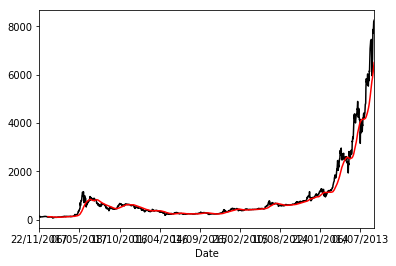

In [86]:
rolling = dt['Close'].rolling(window=44)
rolling_mean = rolling.mean()
#print(rolling_mean.head(10))
# plot original and transformed dataset
dt['Close'].plot(color='black')
rolling_mean.plot(color='red')
plt.show()

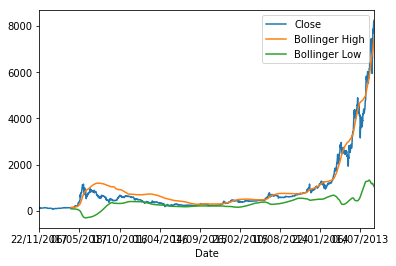

In [106]:
#As above, we can set how far to lookback by toggling the value in 'window', which in this case looks back 160 days
#We can also toggle how many standard deviations to look back by changing 'no_of_std'
window = 160
no_of_std = 2
 
rolling_mean = dt['Close'].rolling(window).mean()
rolling_std = dt['Close'].rolling(window).std()
 
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
dt['Rolling Mean'] = rolling_mean
dt['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
dt['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
dt[['Close','Bollinger High','Bollinger Low']].plot()
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning:

pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=333,center=False).max()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning:

pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=333,center=False).min()



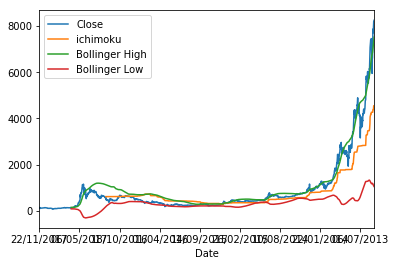

In [126]:
#This code computes the Ichimoku Kinkō Hyō indicator which translates to one glance equilibrium chart


window2 = 333
import datetime
start = datetime.datetime(2013, 4, 28)
end = datetime.datetime(2017, 12, 27)
data=dt
high_prices = data['High']
close_prices = data['Close']
low_prices = data['Low']
dates = dt.index
nine_period_high = pd.rolling_max(data['High'], window= window2 )
nine_period_low = pd.rolling_min(data['Low'], window= window2 )
ichimoku = (nine_period_high + nine_period_low) /2
dt['ichimoku'] = ichimoku
dt[['Close','ichimoku', 'Bollinger High', 'Bollinger Low']].plot()
plt.show()